# Punto 3 - Regresion - Miguel Rios Tangarife

Librerias que vamos a utilizar

In [1]:
import glob
from PIL import Image
import random
import matplotlib.image as img
import numpy as np
import os
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import zipfile
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import plotly.express as px
from datetime import date
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

Leemos los datos

In [2]:
df = pd.read_excel('data/Saber_icfes_XLSX.xlsx')

Al usar "df" vemos que tenemos 68725 rows × 96 columns en un inicio

In [3]:
df

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_EXTERIOR,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DISC_FISICA,ESTU_DISC_SISTEM,ESTU_DISC_AUDITCASTELL,ESTU_DISC_AUDITLSC,ESTU_DISC_VISUALCEGUE,ESTU_DISC_VISUALBAJA,ESTU_DISC_VOZHABLA,ESTU_DISC_INTELEC,ESTU_DISC_ESPAUTISTA,ESTU_DISC_PSICOSOCIAL,ESTU_DISC_ASPERGER,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_AREARESIDE,ESTU_ESTADOCIVIL,ESTU_COLE_TERMINO,ESTU_CODDANE_COLE_TERMINO,ESTU_COD_COLE_MCPIO_TERMINO,ESTU_OTROCOLE_TERMINO,ESTU_TITULOOBTENIDOBACHILLER,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_COMOCAPACITOEXAMENSB11,ESTU_TIPODOCUMENTOSB11,ESTU_SEMESTRECURSA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_CUANTOSCOMPARTEBAÑO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,INST_COD_INSTITUCION,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,ESTU_SNIES_PRGMACADEMICO,GRUPOREFERENCIA,ESTU_PRGM_CODMUNICIPIO,ESTU_PRGM_MUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_NUCLEO_PREGRADO,ESTU_INST_CODMUNICIPIO,ESTU_INST_MUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,INST_ORIGEN,ESTU_PRIVADO_LIBERTAD,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_RAZONA_CUANTITATIVO_PNBC,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_LECTURA_CRITICA_PNBC,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_COMPETEN_CIUDADA_PNBC,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_INGLES_PNBC,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC,ESTU_ESTADOINVESTIGACION
0,CC,COLOMBIA,M,1986-09-16 00:00:00,NO,20201,EK202010002443,ESTUDIANTE,COLOMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CALDAS,17.0,MANIZALES,17001.0,Cabecera Municipal,Unión libre,NaN,NaN,NaN,colegio anglo frances,Bachiller académico,No,No,No,Si,Repasó por cuenta propia,CC,8,Educación profesional incompleta,Secundaria (Bachillerato) completa,No sabe,Es dueño de un negocio pequeño (tiene pocos em...,Estrato 3,Si,Si,Si,Si,Si,Si,No,No,2,Entre un millon y 3 millones de pesose,Más de 30 horas,2818,CORPORACION UNIVERSITARIA DE SANTA ROSA DE CAB...,TECNOLOGIA EN PRODUCCION ANIMAL,2026.0,TECNOLÓGICO EN CIENCIAS AGROPECUARIAS,66682,SANTA ROSA DE CABAL,RISARALDA,TECNOLOGÍA,PRESENCIAL,ZOOTECNIA,66682,SANTA ROSA DE CABAL,RISARALDA,INSTITUCIÓN UNIVERSITARIA,NO OFICIAL - CORPORACIÓN,N,11001,BOGOTÁ D.C.,BOGOTÁ,11,84,43.0,56.0,86,36.0,52.0,105,57.0,68.0,55.0,A1,5.0,9.0,0.0,NaN,1.0,1.0,66,9.0,17.0,PUBLICAR
1,CC,COLOMBIA,F,1996-01-12 00:00:00,NO,20201,EK202010083686,ESTUDIANTE,COLOMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RISARALDA,66.0,SANTA ROSA DE CABAL,66682.0,Cabecera Municipal,Soltero,SE LORENCITA VILLEGAS - SEDE PRINCIPAL,1.666820e+11,66682.0,NaN,Bachiller académico,No,Si,No,No,No realizó ninguna prueba de preparación,TI,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2818,CORPORACION UNIVERSITARIA DE SANTA ROSA DE CAB...,TECNOLOGIA EN DESARROLLO DE SISTEMAS INFORM¿TICOS,104837.0,TECNOLÓGICO EN TIC,66682,SANTA ROSA DE CABAL,RISARALDA,TECNOLOGÍA,PRESENCIAL,"INGENIERÍA DE SISTEMAS, TELEMÁTICA Y AFINES",66682,SANTA ROSA DE CABAL,RISARALDA,INSTITUCIÓN UNIVERSITARIA,NO OFICIAL - CORPORACIÓN,N,11001,BOGOTÁ D.C.,BOGOTÁ,11,107,77.0,68.0,139,98.0,96.0,98,47.0,41.0,108.0,A2,63.0,50.0,134.0,4.0,95.0,93.0,117,89.0,83.0,PUBLICAR
2,CC,COLOMBIA,M,1992-01-28 00:00:00,NO,20201,EK202010000826,ESTUDIANTE,COLOMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CORDOBA,23.0,BUENAVISTA,23079.0,Cabecera Municipal,

## Sobre nulos...

Antes de analizar y filtrar aquellos variables que son más relevantes para el modelo, considero importante tener control sobre los valores nulos

## ¿Qué variables son importantes para predecir el valor?

Para esto analizaremos primero como se comporta la correlacion con variables numericas

In [6]:
# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['number'])

# Calcular la correlación de Pearson entre las columnas numéricas y la variable objetivo
correlation_matrix = numeric_columns.corr(method='pearson')  # Método de Pearson

# Mostrar la correlación con la variable objetivo
correlation_with_target = correlation_matrix['MOD_INGLES_PUNT'].sort_values(ascending=False)
print(correlation_with_target)

MOD_INGLES_PUNT                 1.000000
MOD_INGLES_PNAL                 0.915276
MOD_INGLES_PNBC                 0.890939
PUNT_GLOBAL                     0.688344
PERCENTIL_GLOBAL                0.653711
PERCENTIL_NBC                   0.628640
MOD_COMPETEN_CIUDADA_PUNT       0.565076
MOD_COMPETEN_CIUDADA_PNAL       0.521237
MOD_COMPETEN_CIUDADA_PNBC       0.500090
MOD_LECTURA_CRITICA_PUNT        0.458818
MOD_LECTURA_CRITICA_PNAL        0.439626
MOD_LECTURA_CRITICA_PNBC        0.414196
MOD_RAZONA_CUANTITAT_PUNT       0.383344
MOD_RAZONA_CUANTITATIVO_PNAL    0.375860
MOD_RAZONA_CUANTITATIVO_PNBC    0.351714
MOD_COMUNI_ESCRITA_DESEM        0.207320
MOD_COMUNI_ESCRITA_PNAL         0.201437
MOD_COMUNI_ESCRITA_PNBC         0.194635
MOD_COMUNI_ESCRITA_PUNT         0.154306
ESTU_CODDANE_COLE_TERMINO       0.023098
ESTU_INST_CODMUNICIPIO          0.009521
ESTU_COD_DEPTO_PRESENTACION    -0.026034
ESTU_COD_MCPIO_PRESENTACION    -0.026076
ESTU_PRGM_CODMUNICIPIO         -0.044239
ESTU_SNIES_PRGMA

Observamos que las variables con un valor o tendencia a 0 son las que menor impacto tienen sobre la variable objetivo, por lo tanto pueden ser consideradas para eliminarse.

Lista de variables con correlación débil(cercana a 0)
- ESTU_CODDANE_COLE_TERMNIO = 0.023098
- ESTU_INST_CODMUNICIPIO = 0.009521
- ESTU_COD_DEPTO_PRESENTACION = -0.026034
- ESTU_COD_MCPIO_PRESENTACION = -0.026076
- ESTU_PRGM_CODMUNICIPIO = -0.044239
- ESTU_SNIES_PRGMACADEMICO = -0.048742
- ESTU_COD_RESIDE_DEPTO = -0.051843
- ESTU_COD_RESIDE_MCPIO = -0.052533
- INST_COD_INSTITUCION = -0.055878
- ESTU_COD_COLE_MCPIO_TERMINO = -0.062758


Una vez analizadas las variables numericas, abordemos las variables categoricas

In [7]:
categorical_columns = df.select_dtypes(include=['object']).columns

In [8]:
categorical_columns

Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'ESTU_EXTERIOR', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE', 'ESTU_DISC_FISICA',
       'ESTU_DISC_SISTEM', 'ESTU_DISC_AUDITCASTELL', 'ESTU_DISC_AUDITLSC',
       'ESTU_DISC_VISUALCEGUE', 'ESTU_DISC_VISUALBAJA', 'ESTU_DISC_VOZHABLA',
       'ESTU_DISC_INTELEC', 'ESTU_DISC_ESPAUTISTA', 'ESTU_DISC_PSICOSOCIAL',
       'ESTU_DISC_ASPERGER', 'ESTU_DEPTO_RESIDE', 'ESTU_MCPIO_RESIDE',
       'ESTU_AREARESIDE', 'ESTU_ESTADOCIVIL', 'ESTU_COLE_TERMINO',
       'ESTU_OTROCOLE_TERMINO', 'ESTU_TITULOOBTENIDOBACHILLER',
       'ESTU_PAGOMATRICULABECA', 'ESTU_PAGOMATRICULACREDITO',
       'ESTU_PAGOMATRICULAPADRES', 'ESTU_PAGOMATRICULAPROPIO',
       'ESTU_COMOCAPACITOEXAMENSB11', 'ESTU_TIPODOCUMENTOSB11',
       'ESTU_SEMESTRECURSA', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTE

Mirando los datos en excel podemos determinar que aquellas variables categóricas que tienen el mismo valor en todas sus filas o en la gran mayoria y no aportan información variada podemos descartarlas.

Lista de variables categoricas que tienen el mismo valor en todas sus filas:
- ESTU_EXTERIOR
- PERIODO
- ESTU_ESTUDIANTE
- ESTU_PRIVADO_LIBERTAD

In [26]:
import pandas as pd
variables_categoricas = [
    'ESTU_TIPODOCUMENTO'
]
variables_categoricas.append('MOD_INGLES_PUNT')
df_dummies = pd.get_dummies(df[variables_categoricas], columns=variables_categoricas[:-1], drop_first=True)
correlation_matrix = df_dummies.corr(method='pearson')  # Método de Pearson
correlation_with_target = correlation_matrix['MOD_INGLES_PUNT'].sort_values(ascending=False)
print("\nCorrelación con la variable objetivo:")
print(correlation_with_target)


Correlación con la variable objetivo:
MOD_INGLES_PUNT           1.000000
ESTU_TIPODOCUMENTO_TI     0.042881
ESTU_TIPODOCUMENTO_CE     0.018965
ESTU_TIPODOCUMENTO_PE     0.016943
ESTU_TIPODOCUMENTO_CR     0.004937
ESTU_TIPODOCUMENTO_PEP    0.000504
Name: MOD_INGLES_PUNT, dtype: float64


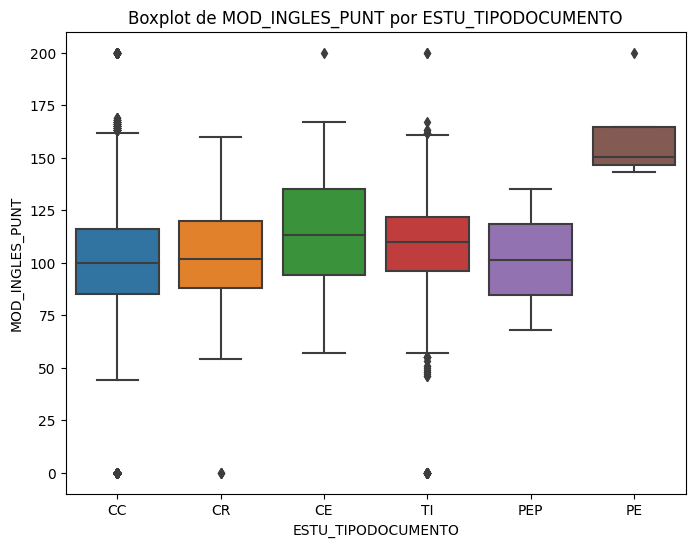

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'df' es tu DataFrame original

# Variables categóricas
variables_categoricas = ['ESTU_TIPODOCUMENTO']

# Variables de interés
variables_de_interes = ['MOD_INGLES_PUNT']

# Selecciona las columnas de interés en el DataFrame original
df_subset = df[variables_categoricas + variables_de_interes]

# Crea un boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='ESTU_TIPODOCUMENTO', y='MOD_INGLES_PUNT', data=df_subset)
plt.xlabel('ESTU_TIPODOCUMENTO')
plt.ylabel('MOD_INGLES_PUNT')
plt.title('Boxplot de MOD_INGLES_PUNT por ESTU_TIPODOCUMENTO')
plt.show()

En el caso de la variable categorica 'ESTU_TIPODOCUMENTO', observamos que por su correlacion no tiene gran impacto sobre la variable objetivo, además en el boxplot podemos ver una relacion simular entre todos los tipos de documentos menos por PE(Permiso Especial de Permanencia) del cual solo hay 4 registros en todos los datos de esa columna, es por eso que no afecta a la variable objetivo esta variable categorica.

De aqui en adelante usaré la correlación para analizar las dummie variables